In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_regression, make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
# 1. MSE and MAE for 'diamonds' dataset
sns.set(style='whitegrid')
diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


MSE: 2333883.1792799835
MAE: 994.736665092202


In [3]:
# 2. MSE, MAE, RMSE for linear regression model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")
evaluate_model(y_test, y_pred)

MSE: 2333883.1792799835, MAE: 994.736665092202, RMSE: 1527.7052003838908


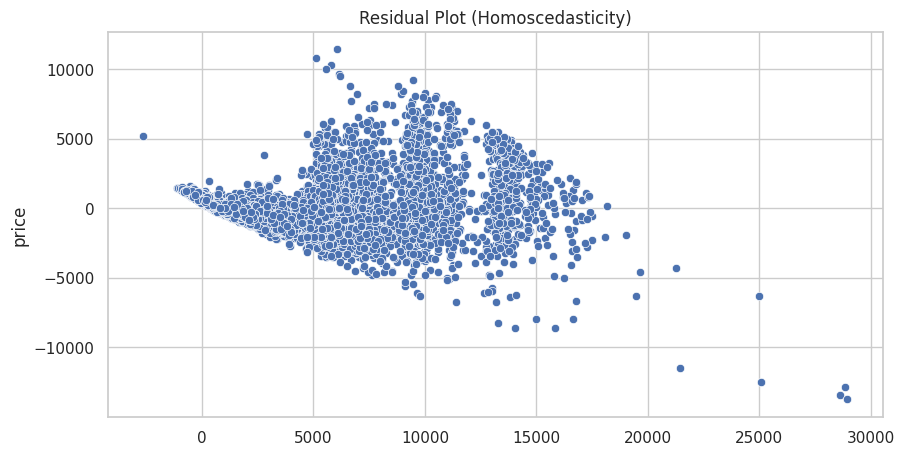

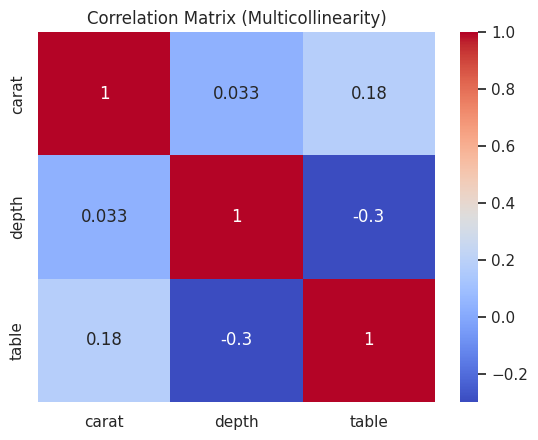

In [4]:
# 3. Check linear regression assumptions
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=(y_test - y_pred))
plt.title('Residual Plot (Homoscedasticity)')
plt.show()

corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Multicollinearity)')
plt.show()

In [5]:
# 4. ML pipeline with standardization and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)
print("Pipeline R-squared:", pipeline.score(X_test, y_test))


Pipeline R-squared: 0.853185544894256


In [6]:
# 5. Simple linear regression
simple_model = LinearRegression()
simple_model.fit(X_train[['carat']], y_train)
print("Coefficient:", simple_model.coef_[0], "Intercept:", simple_model.intercept_)


Coefficient: 7768.910490360821 Intercept: -2261.9117456492177


In [7]:
# 6. Simple linear regression on 'tips' dataset
tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']
tips_model = LinearRegression()
tips_model.fit(X, y)
print("Slope:", tips_model.coef_[0], "Intercept:", tips_model.intercept_)


Slope: 0.10502451738435337 Intercept: 0.9202696135546731


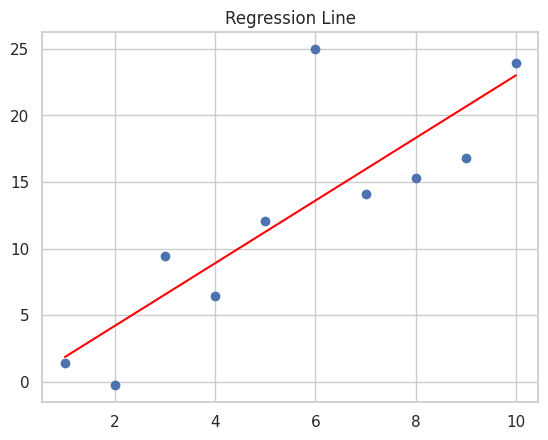

In [8]:
# 7. Fit and plot simple linear regression
X = np.array([[i] for i in range(1, 11)])
y = 2 * X.flatten() + np.random.randn(10) * 3
plt.scatter(X, y)
simple_model.fit(X, y)
plt.plot(X, simple_model.predict(X), color='red')
plt.title('Regression Line')
plt.show()

In [9]:
# 8. Pickle a model
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)

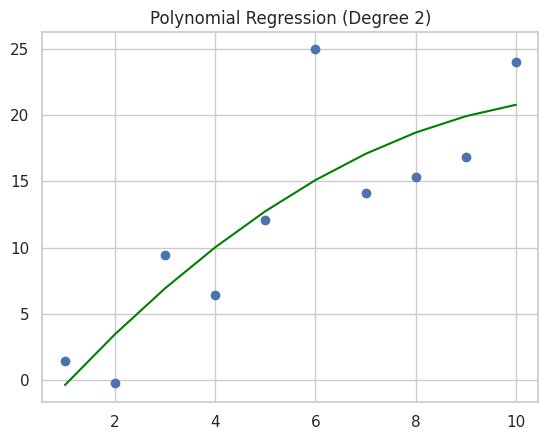

In [10]:
# 9. Polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, poly_model.predict(X_poly), color='green')
plt.title('Polynomial Regression (Degree 2)')
plt.show()

In [11]:
# 10. Synthetic data for simple linear regression
X = np.random.rand(100, 1) * 10
y = 5 * X + np.random.randn(100, 1) * 5
simple_model.fit(X, y)
print("Coefficient:", simple_model.coef_[0], "Intercept:", simple_model.intercept_)

Coefficient: [4.94084515] Intercept: [0.21809191]


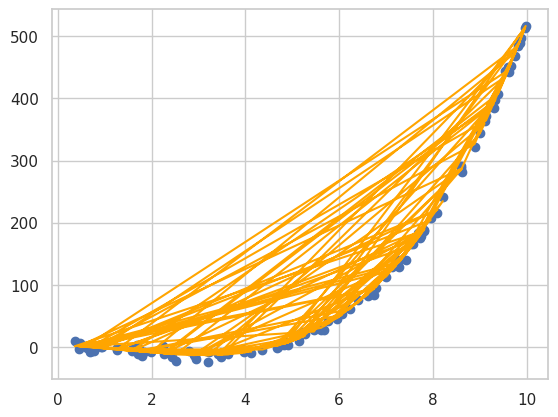

In [12]:
# 11. Polynomial regression (degree 3) on synthetic data
X = np.random.rand(100, 1) * 10
y = X**3 - 5 * X**2 + 2 * X + np.random.randn(100, 1) * 5
X_poly = PolynomialFeatures(degree=3).fit_transform(X)
poly_model.fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, poly_model.predict(X_poly), color='orange')
plt.show()

In [13]:
# 12. Linear regression with two features
X = np.random.rand(100, 2) * 10
simple_model.fit(X, y)
print("Coefficients:", simple_model.coef_, "Intercept:", simple_model.intercept_)

Coefficients: [[16.06039331 -0.55994107]] Intercept: [44.23979914]


In [14]:
# 13. Linear regression with synthetic data and error metrics
evaluate_model(y, simple_model.predict(X))

MSE: 24677.917451407084, MAE: 129.80086451219626, RMSE: 157.09206679971805


In [15]:
# 14. VIF to check for multicollinearity
X = pd.DataFrame(np.random.rand(100, 3), columns=['A', 'B', 'C'])
X['D'] = X['A'] + X['B'] * 0.5  # Add collinearity
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data['Feature'] = X.columns
print(vif_data)


        VIF Feature
0       inf       A
1       inf       B
2  3.113006       C
3       inf       D


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


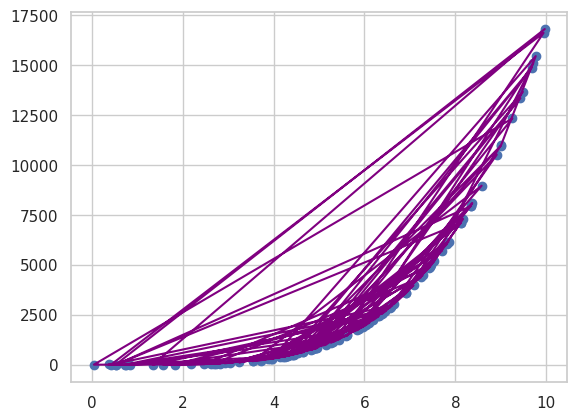

In [16]:
# 15. Polynomial regression (degree 4) with synthetic data
X = np.random.rand(100, 1) * 10
y = 2 * X**4 - 3 * X**3 + X**2 - 5 * X + np.random.randn(100, 1) * 10
X_poly = PolynomialFeatures(degree=4).fit_transform(X)
poly_model.fit(X_poly, y)
plt.scatter(X, y)
plt.plot(X, poly_model.predict(X_poly), color='purple')
plt.show()


In [17]:
# 16. Machine Learning Pipeline with Data Standardization and Multiple Linear Regression
def pipeline_regression(X, y):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])
    pipeline.fit(X, y)
    r2 = pipeline.score(X, y)
    print(f'Pipeline R-squared: {r2}')

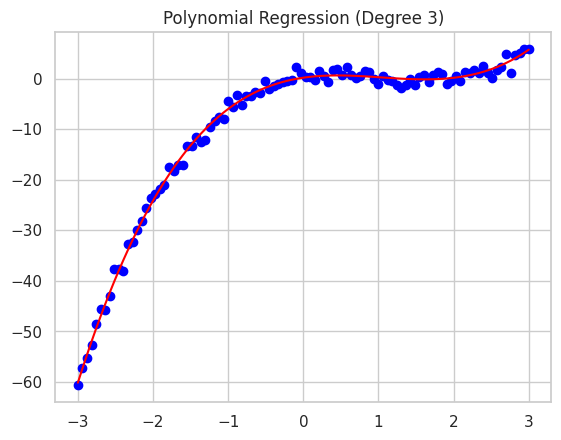

In [18]:
# 17. Polynomial Regression (Degree 3) and Plot
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = X**3 - 3*X**2 + 2*X + np.random.randn(100, 1)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression (Degree 3)')
plt.show()

In [24]:
# 18. Multiple Linear Regression on Synthetic Data (5 Features)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)
model = LinearRegression().fit(X, y)
print(f'Multiple Linear Regression R-squared: {model.score(X, y)}')
print(f'Coefficients: {model.coef_}')


Multiple Linear Regression R-squared: 0.99999909485711
Coefficients: [54.13049839 40.01477095 44.18169288 65.84401621 21.48310781]


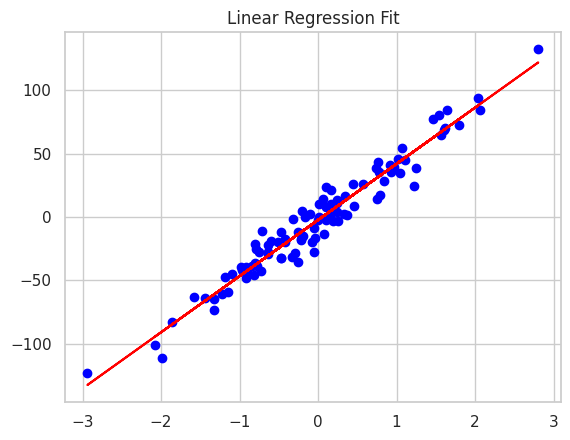

In [25]:
# 19. Linear Regression Visualization
X, y = make_regression(n_samples=100, n_features=1, noise=10)
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression Fit')
plt.show()

In [26]:
# 20. Multiple Linear Regression (3 Features)
X, y = make_regression(n_samples=100, n_features=3, noise=0.2)
model = LinearRegression().fit(X, y)
print(f'Multiple Regression (3 features) R-squared: {model.score(X, y)}')
print(f'Coefficients: {model.coef_}')

Multiple Regression (3 features) R-squared: 0.9999972912241777
Coefficients: [60.71655702 92.6702815   3.74822183]


In [27]:
# 21. Pickling a Model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('linear_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    print(f'Loaded Model R-squared: {loaded_model.score(X, y)}')

Loaded Model R-squared: 0.9999972912241777


In [28]:
# 22. Linear Regression with One-Hot Encoding (Tips Dataset)
data = sns.load_dataset('tips')
X = data[['total_bill', 'size', 'sex']]
y = data['tip']
X = pd.get_dummies(X, drop_first=True)
model = LinearRegression().fit(X, y)
print(f'Linear Regression with Categorical R-squared: {model.score(X, y)}')


Linear Regression with Categorical R-squared: 0.4679515306619907


In [29]:
# 23. Ridge vs Linear Regression Comparison
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)
ridge = Ridge(alpha=1.0).fit(X, y)
linear = LinearRegression().fit(X, y)
print(f'Linear Regression Coefficients: {linear.coef_}')
print(f'Ridge Regression Coefficients: {ridge.coef_}')
print(f'Linear Regression R-squared: {linear.score(X, y)}')
print(f'Ridge Regression R-squared: {ridge.score(X, y)}')


Linear Regression Coefficients: [90.43454734 17.24525877 88.09892479 66.36335641 42.59525387]
Ridge Regression Coefficients: [89.4856262  16.92077359 87.21032032 65.64109261 42.27302128]
Linear Regression R-squared: 0.9999994265581731
Ridge Regression R-squared: 0.9998951197654026


In [30]:
# 24. Cross-validation for Linear Regression
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print(f'Cross-validation R-squared scores: {scores}')


Cross-validation R-squared scores: [0.99999862 0.99999944 0.99999948 0.99999851 0.99999953]


In [31]:
# 25. Comparing Polynomial Regression Models
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X[:, 0].reshape(-1, 1))
    model = LinearRegression().fit(X_poly, y)
    print(f'Polynomial Degree {degree} R-squared: {model.score(X_poly, y)}')


Polynomial Degree 1 R-squared: 0.3972017538136505
Polynomial Degree 2 R-squared: 0.39825892068379454
Polynomial Degree 3 R-squared: 0.4034494114052275
Polynomial Degree 4 R-squared: 0.41167157459494264


In [32]:
# 26. Adding Interaction Terms
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_interaction = poly.fit_transform(X)
model = LinearRegression().fit(X_interaction, y)
print(f'Interaction Term Coefficients: {model.coef_}')


Interaction Term Coefficients: [ 0.00000000e+00  9.04362491e+01  1.72468149e+01  8.80951431e+01
  6.63716550e+01  4.26020550e+01 -1.32640435e-02 -8.97973077e-03
  1.00428310e-02  2.08714000e-03  2.21997691e-03  9.40875444e-03
  1.81895016e-02 -4.50728519e-05 -1.10391089e-03  1.42060450e-02]
